1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
df=pd.read_csv("parkinsons.data")

In [28]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [29]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [30]:
#let's rename the columns to make it readable 
df.columns = ['PName','MFo','MFhi','MFlo','MJitter_Percent','MJitter_Abs','MRAP','MPPQ','JDDP','MShimmer','MShimmer_dB','SAPQ3','SAPQ5','MAPQ','SDDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MFo,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MFhi,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MFlo,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MJitter_Percent,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MJitter_Abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MRAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MPPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
JDDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MShimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MShimmer_dB,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [13]:
df.isnull().sum()

PName              0
MFo                0
MFhi               0
MFlo               0
MJitter_Percent    0
MJitter_Abs        0
MRAP               0
MPPQ               0
JDDP               0
MShimmer           0
MShimmer_dB        0
SAPQ3              0
SAPQ5              0
MAPQ               0
SDDA               0
NHR                0
HNR                0
RPDE               0
DFA                0
spread1            0
spread2            0
D2                 0
PPE                0
status             0
dtype: int64

In [37]:
df[df.isna().any(axis=1)]

,PName,MFo,MFhi,MFlo,MJitter_Percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,...,SDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
PName              195 non-null object
MFo                195 non-null float64
MFhi               195 non-null float64
MFlo               195 non-null float64
MJitter_Percent    195 non-null float64
MJitter_Abs        195 non-null float64
MRAP               195 non-null float64
MPPQ               195 non-null float64
JDDP               195 non-null float64
MShimmer           195 non-null float64
MShimmer_dB        195 non-null float64
SAPQ3              195 non-null float64
SAPQ5              195 non-null float64
MAPQ               195 non-null float64
SDDA               195 non-null float64
NHR                195 non-null float64
HNR                195 non-null float64
RPDE               195 non-null int64
DFA                195 non-null float64
spread1            195 non-null float64
spread2            195 non-null float64
D2                 195 non-null float64
PPE               

In [39]:
df[df.isnull().any(axis=1)]

,PName,MFo,MFhi,MFlo,MJitter_Percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,...,SDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status


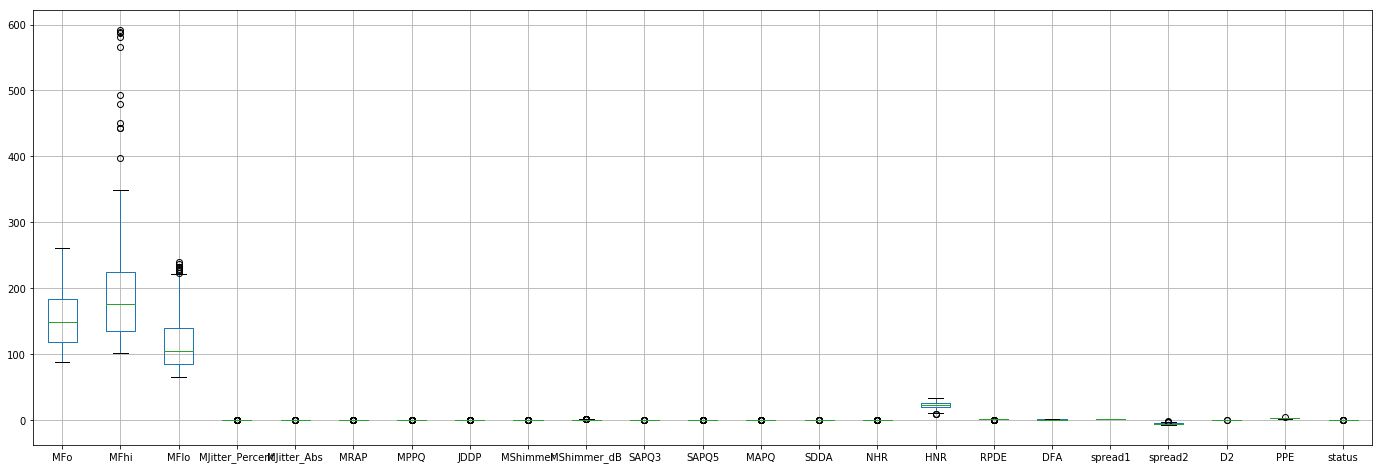

In [40]:
# Verify the outliers for the model
df.boxplot(figsize=(24,8))

In [41]:
df.corr()

,MFo,MFhi,MFlo,MJitter_Percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,MShimmer_dB,...,SDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
MFo,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MFhi,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MFlo,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MJitter_Percent,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MJitter_Abs,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MRAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MPPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
JDDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MShimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MShimmer_dB,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


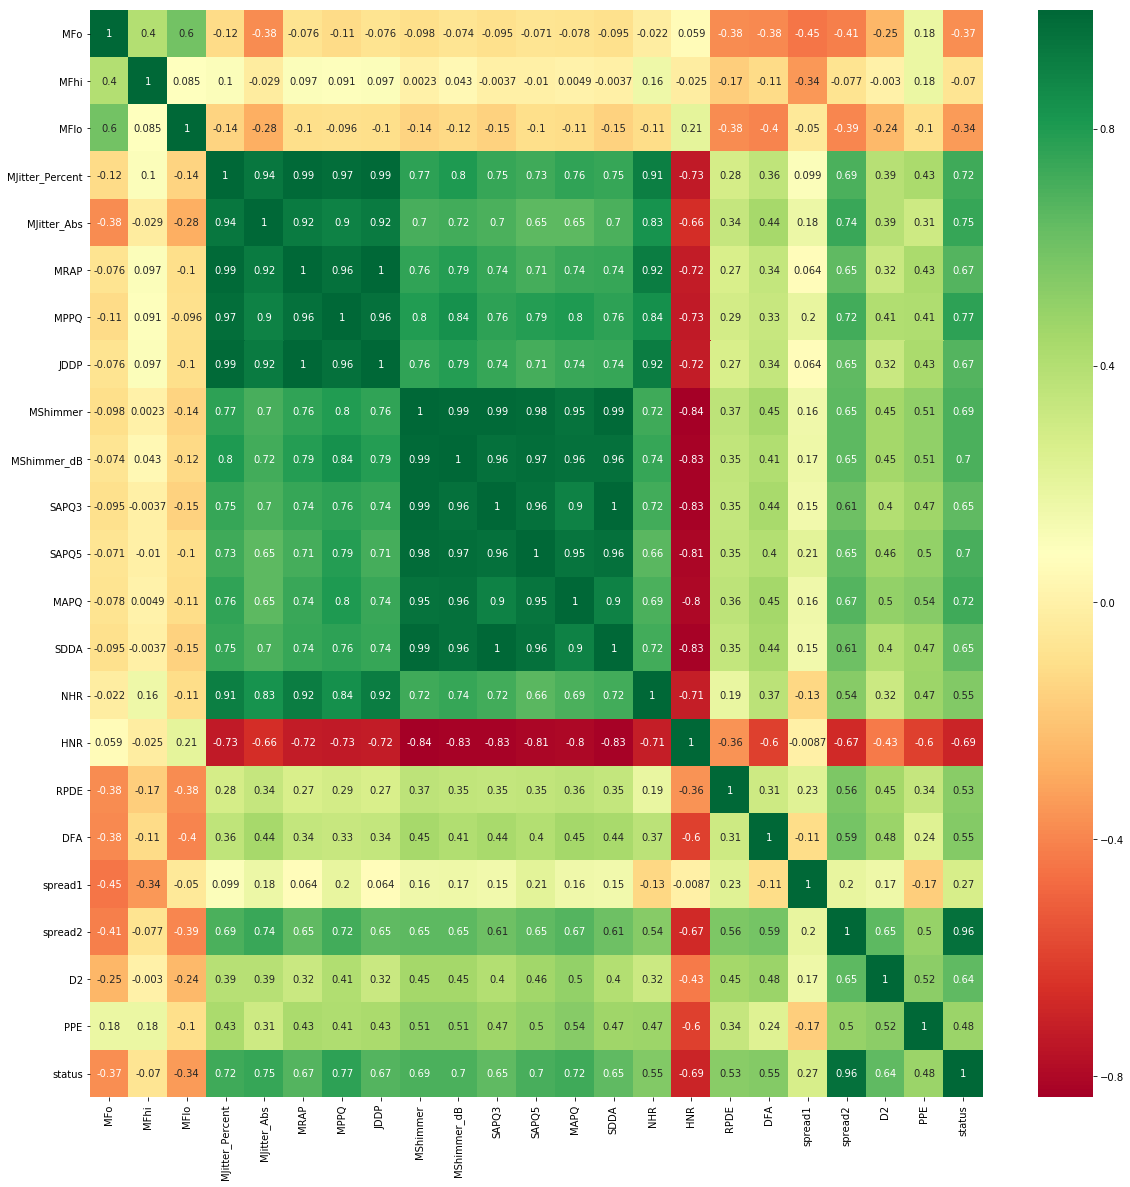

In [42]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Majority of the variables are strongly Positively/Negatively correlated as per the above heatmap.
Variables MFo,MFhi,MFIo, dspread1, D2, PPE are not strongly correlated.
1. MFhi is strongly correlated wiht MFo, but not correlated with the status, we can ignore this field for the model
2. RDPE & DFA are slightly correlated with the Spread2.  As spread2 is strongly correlated 
3. HNR is having a strong negative correlation wiht majority of the variables. 
4. Spread1 variable has all negative values, that are impact
5. MShimmer, MShimmer(db),SAPQ3, SAPQ5,MAPQ,SDDA,NHR are having strongest correlation.
6. spread2,PPE are moderately correlated.

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,SelectPercentile,f_regression

In [45]:
X = df.drop(["status","PName"],axis=1)  #independent columns
#X=df.drop("PName",axis=1)
y = df["status"]    #target column i.e price range
X.shape,y.shape
X.head()

,MFo,MFhi,MFlo,MJitter_Percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,MShimmer_dB,...,MAPQ,SDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [60]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)
#X1=X.drop(["spread1"],axis=1)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

featureScores

,Specs,Score
0,MFo,31.066682
1,MFhi,0.937928
2,MFlo,25.239019
3,MJitter_Percent,209.606893
4,MJitter_Abs,245.383158
5,MRAP,158.062102
6,MPPQ,280.453432
7,JDDP,158.067422
8,MShimmer,179.096834
9,MShimmer_dB,180.383952


In [61]:
print(featureScores.nlargest(24,'Score'))

              Specs        Score
19          spread2  2425.074257
6              MPPQ   280.453432
4       MJitter_Abs   245.383158
12             MAPQ   209.790030
3   MJitter_Percent   209.606893
11            SAPQ5   188.004242
9       MShimmer_dB   180.383952
8          MShimmer   179.096834
15              HNR   178.208777
7              JDDP   158.067422
5              MRAP   158.062102
13             SDDA   137.777890
10            SAPQ3   137.768913
20               D2   137.282765
14              NHR    84.840605
17              DFA    81.925347
16             RPDE    75.803195
21              PPE    57.962730
0               MFo    31.066682
2              MFlo    25.239019
18          spread1    15.230019
1              MFhi     0.937928


In [62]:
#So, from the above logic, MFhi has the least score,
#we can ignore the variable MFhis for our modeling. So let us drop this column

#We can also drop the categorical variable PName as it doesn't have any significant impact on the data set
df_new=df.drop(["MFhi","PName"],axis=1)

In [63]:
df_new.head()

,MFo,MFlo,MJitter_Percent,MJitter_Abs,MRAP,MPPQ,JDDP,MShimmer,MShimmer_dB,SAPQ3,...,SDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Univaraite Analysis

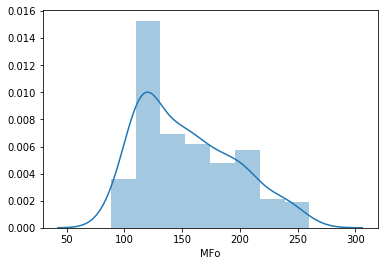

In [64]:
sns.distplot(df_new.MFo, kde=True);


MFo is right skewed with the mean of 150 Most of the values are between 90 and 260 approximately.
Mean is 154 and Median is 148 

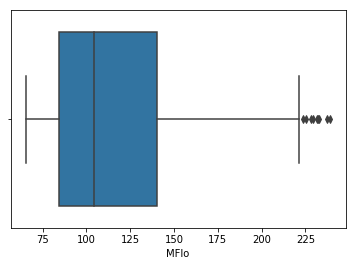

In [65]:
sns.boxplot(df_new.MFlo); 

For the variable MFlo, there are some outlier values. 
Mean is at 110 approximatley and the majority of the values are between 80 and 140


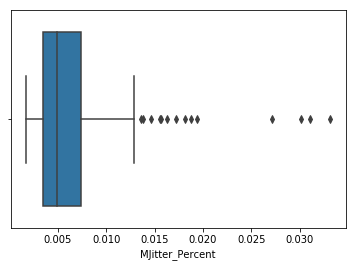

In [66]:
sns.boxplot(df_new.MJitter_Percent); 


For the variable MJitter(%), the values are very close to 0.005 . There are some outlier value, but majority of the values are between 0.003 to 0.007 with an approximate mean of 0.005

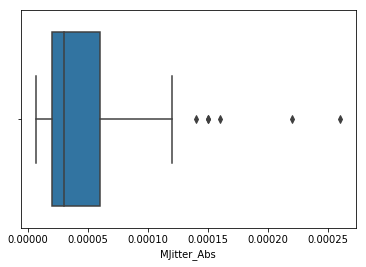

In [67]:
sns.boxplot(df_new.MJitter_Abs); 


There are soem outliers for the variable MJitter(Abs). The MJitter (abs) and MJitter (%) values both are mostly similar in distribution, with MJitter(%) having more outliers.

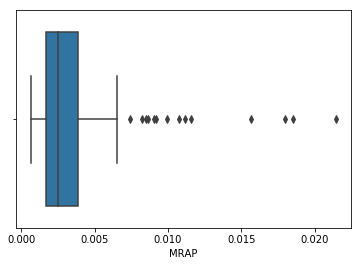

In [69]:
sns.boxplot(df_new.MRAP); 

MRAP field has more outliers with values greater than 0.006.
Mean is at 0.025 and most of the values are between 0.002 to 0.004

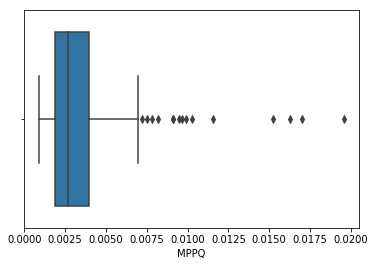

In [70]:
sns.boxplot(df_new.MPPQ); 


MPPQ has outliers that are with values greater than 0.007 It is right skewed 

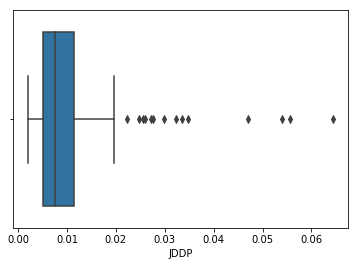

In [71]:
sns.boxplot(df_new.JDDP); 

Values for JDDP field are mostly near 0.002 to 0.015 There are many outliers that are beyond the value 0.02

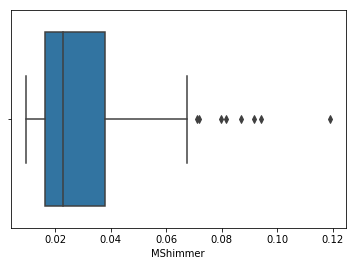

In [72]:
sns.boxplot(df_new.MShimmer); 


MShimmer field has the important values 0.015 and 0.038, wiht outlier values greater than 0.07

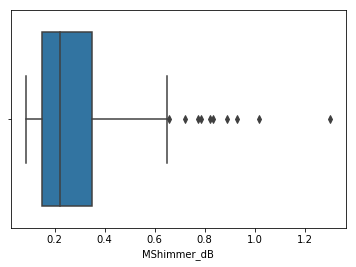

In [73]:
sns.boxplot(df_new.MShimmer_dB); 

MShimmer_dB has some outliers with values greater than 0.7

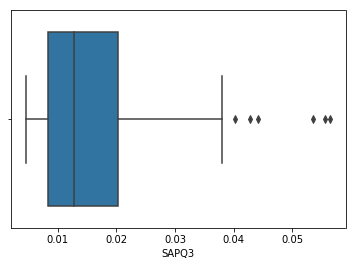

In [74]:
sns.boxplot(df_new.SAPQ3); 

SAPQ3 has very few outliers. It's main values are between 0.008 to 0.02 Median is approximately at 0.04

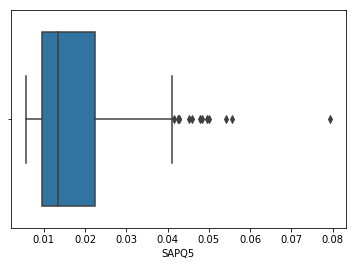

In [75]:
sns.boxplot(df_new.SAPQ5); 

SAPQ5 has outlier values that are above 0.043

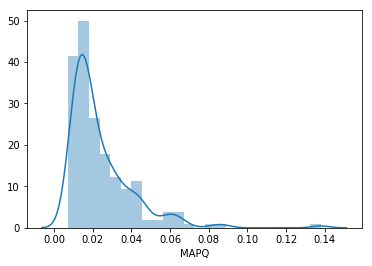

In [76]:
sns.distplot(df_new.MAPQ); 

MAPQ has few outliers with values above 0.09
it is right skewed and mean is approximately at 0.023

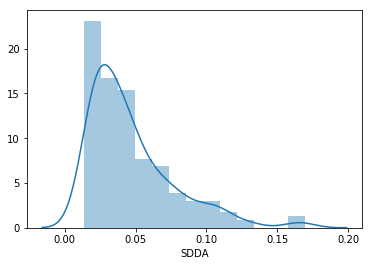

In [78]:
sns.distplot(df_new.SDDA); 

SDDA is right skewed with very few outliers

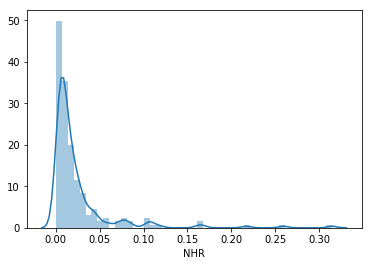

In [79]:
sns.distplot(df_new.NHR); 

NHR is right skewed with approximately 80 people having the values between 0.01 to 0.03

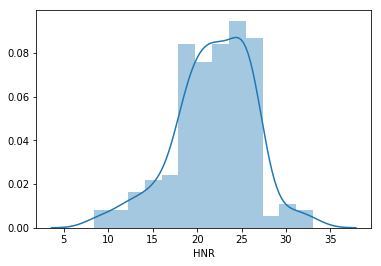

In [80]:
sns.distplot(df_new.HNR); 


HNR attribute is left skewed with no major outliers Around 120 patients have the HNR between 20 to 32

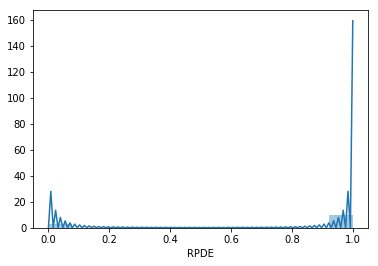

In [81]:
sns.distplot(df_new.RPDE); 

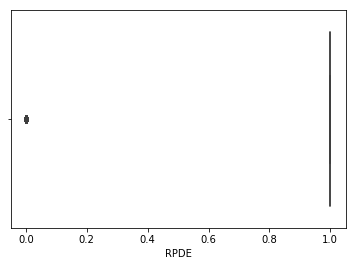

In [82]:
sns.boxplot(df_new.RPDE)

RPDE has very narrow range of values. This is not giving enough info

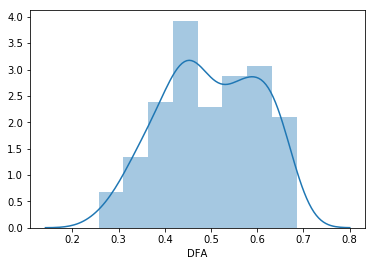

In [83]:
sns.distplot(df_new.DFA); 

DFA is Left skewed with mean value of 0.71 

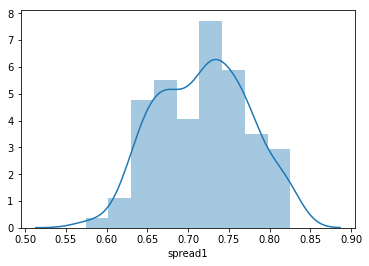

In [84]:
sns.distplot(df_new.spread1); 

spread1 is left skewed

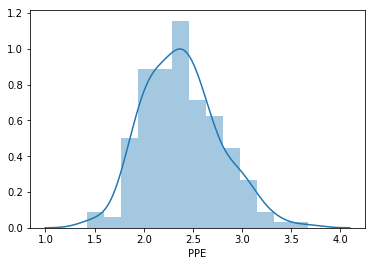

In [85]:
sns.distplot(df_new.PPE); 

PPE is right skewed

### Bivariate Analysis

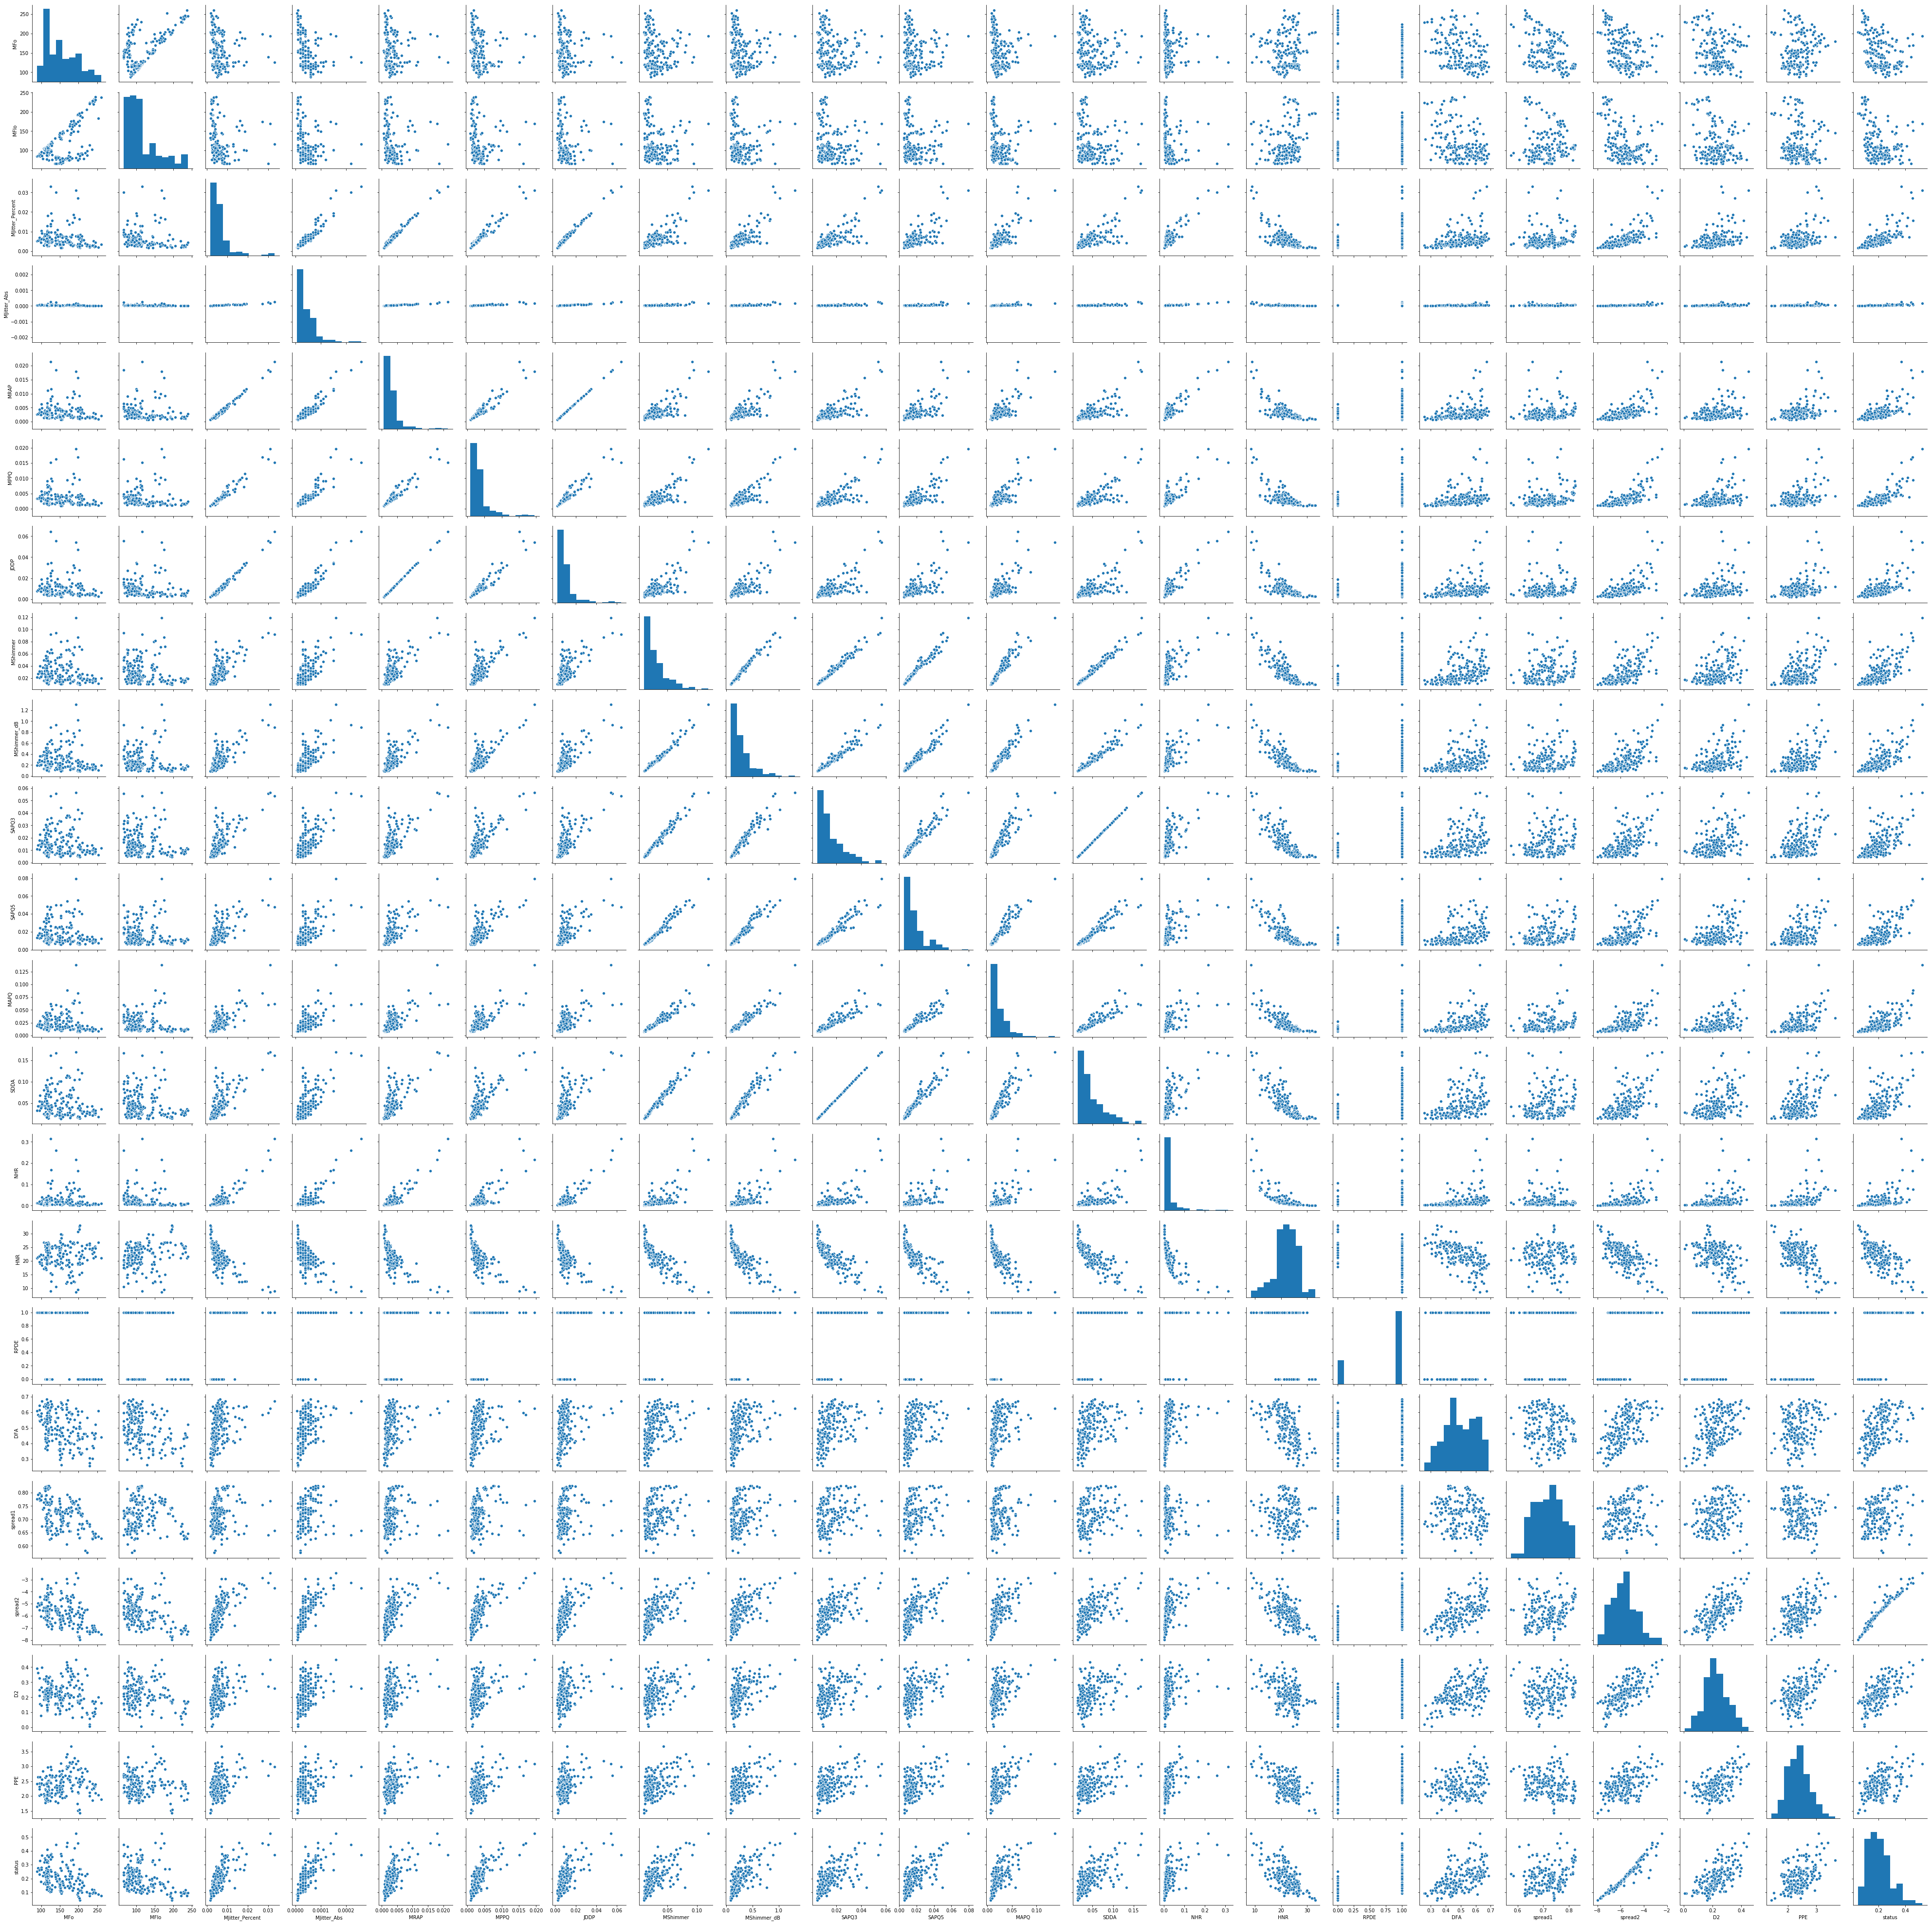

In [89]:
sns.pairplot(df_new); 
plt.show()


### Model Creation

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)

C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vs104709\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [91]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer 

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [93]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=6)
regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


In [94]:
feature_names = X.columns
print(feature_names)
k = 8
print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])
print(feature_names[top_k_idx], feature_importances)

RangeIndex(start=0, stop=22, step=1)
[1.26842847e-03 2.70657607e-02 1.03376823e-02 4.25020034e-03
 6.11574440e-05 3.01179194e-04 5.58386091e-05 1.05691177e-03
 0.00000000e+00 0.00000000e+00 9.62137424e-04 1.37683015e-03
 9.53245258e-04 0.00000000e+00 1.60852744e-04 5.12233108e-03
 0.00000000e+00 9.13080050e-07 1.69330557e-03 9.44970448e-01
 3.62778005e-04 0.00000000e+00]
Int64Index([19, 1, 2, 15, 3, 18, 11, 0], dtype='int64') [1.26842847e-03 2.70657607e-02 1.03376823e-02 4.25020034e-03
 6.11574440e-05 3.01179194e-04 5.58386091e-05 1.05691177e-03
 0.00000000e+00 0.00000000e+00 9.62137424e-04 1.37683015e-03
 9.53245258e-04 0.00000000e+00 1.60852744e-04 5.12233108e-03
 0.00000000e+00 9.13080050e-07 1.69330557e-03 9.44970448e-01
 3.62778005e-04 0.00000000e+00]


In [100]:
from IPython.display import Image  
from sklearn import tree
from os import system


test_file = open('C:\\Users\\vs104709\\Documents\\AIML\\Residency4\\parkinson.dot','w')
dot_data = tree.export_graphviz(regressor, out_file=test_file, feature_names =(['spread2','MPPQ','MJitter_Abs','MAPQ','MJitter_Percent','SAPQ5','MShimmer_dB','MShimmer','HNR','JDDP','MRAP','SDDA','SAPQ3','D2','NHR','DFA','RPDE','PPE'
,'MFo','MFlo','spread1','MFhi']) )

test_file.close()

In [103]:
system("dot -Tpng C:/Users/vs104709/Documents/AIML/Residency4/parkinson.dot -o C:/Users/vs104709/Documents/AIML/Residency4/parkinson.png")

1

In [104]:
y_pred = regressor.predict(X_test)

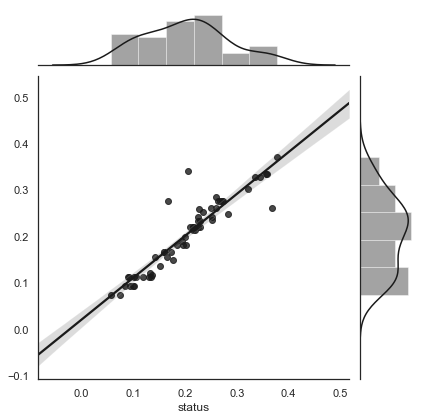

In [105]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [122]:

regressor = DecisionTreeRegressor(random_state=0, max_depth=15)
regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_



In [123]:
feature_names = X.columns
print(feature_names)
k = 8
print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])
print(feature_names[top_k_idx], feature_importances)

RangeIndex(start=0, stop=22, step=1)
[6.73654636e-05 2.71885656e-02 1.04031836e-02 2.44029904e-04
 1.07624931e-04 2.38207000e-04 4.03061758e-03 3.00749656e-04
 6.43172113e-06 1.63204347e-04 1.12948197e-03 8.00914426e-04
 2.13009691e-03 4.29366028e-04 1.15534600e-03 5.39879458e-03
 0.00000000e+00 1.52996685e-03 9.15579245e-03 9.34895844e-01
 5.01019256e-04 1.23397372e-04]
Int64Index([19, 1, 2, 18, 15, 6, 12, 17], dtype='int64') [6.73654636e-05 2.71885656e-02 1.04031836e-02 2.44029904e-04
 1.07624931e-04 2.38207000e-04 4.03061758e-03 3.00749656e-04
 6.43172113e-06 1.63204347e-04 1.12948197e-03 8.00914426e-04
 2.13009691e-03 4.29366028e-04 1.15534600e-03 5.39879458e-03
 0.00000000e+00 1.52996685e-03 9.15579245e-03 9.34895844e-01
 5.01019256e-04 1.23397372e-04]


In [124]:
y_pred = regressor.predict(X_test)

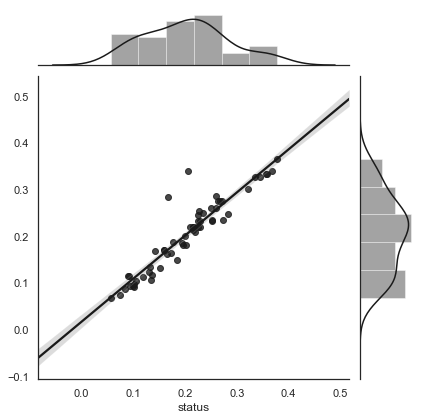

In [125]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [127]:
regressor.score

<bound method RegressorMixin.score of DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')>

In [132]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=600)
rfc.fit(X_train,y_train)
RandomForestRegressor(bootstrap=True,  criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=20, verbose=0,
            warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

In [134]:
# Use the forest's predict method on the test data
prediction = rfc.predict(X_test)


In [136]:
# Calculate the absolute errors
errors = abs(prediction - y_test)

In [137]:

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [138]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 92.85 %.


In [145]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
 
# Pull out one tree from the forest
tree = rfc.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot',  rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [147]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [149]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                   19 Importance: 0.93
Variable:                   11 Importance: 0.02
Variable:                    2 Importance: 0.01
Variable:                    6 Importance: 0.01
Variable:                    0 Importance: 0.0
Variable:                    1 Importance: 0.0
Variable:                    3 Importance: 0.0
Variable:                    4 Importance: 0.0
Variable:                    5 Importance: 0.0
Variable:                    7 Importance: 0.0
Variable:                    8 Importance: 0.0
Variable:                    9 Importance: 0.0
Variable:                   10 Importance: 0.0
Variable:                   12 Importance: 0.0
Variable:                   13 Importance: 0.0
Variable:                   14 Importance: 0.0
Variable:                   15 Importance: 0.0
Variable:                   16 Importance: 0.0
Variable:                   17 Importance: 0.0
Variable:                   18 Importance: 0.0
Variable:                   20 Importance: 0.0
Variable:

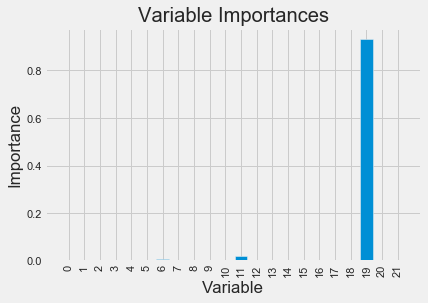

In [151]:
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');